In [1]:
import pandas as pd
import sys
import os
sys.path.append('../code')

In [2]:
import quandl_api_test as qat

In [3]:
os.chdir('..')  # hack to be able to load data

In [4]:
market_data = qat.load_save_data()

up to date on a daily basis...loading...
2017-04-23/bitkonan
2017-04-23/bitstamp
2017-04-23/btce
2017-04-23/localbtc
2017-04-23/rock
2017-04-23/vcx


In [5]:
market_data.keys()

dict_keys(['bitkonan', 'bitstamp', 'btce', 'localbtc', 'rock', 'vcx'])

In [ ]:
bitstamp_df = market_data['bitstamp']
btce_df = market_data['btce']

In [7]:
bitstamp_df.head()

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2011-09-13,5.80,6.00,5.65,5.97,58.371382,346.097389,5.929231
1,2011-09-14,5.58,5.72,5.52,5.53,61.145984,341.854813,5.590798
2,2011-09-15,5.12,5.24,5.00,5.13,80.140795,408.259002,5.094272
3,2011-09-16,4.82,4.87,4.80,4.85,39.914007,193.763147,4.854515
4,2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000


In [8]:
# bitstamp is the best one...use that data, and fill in missing data with btce

In [32]:
bitstamp_df['Date'] = pd.to_datetime(bitstamp_df['Date'])
btce_df['Date'] = pd.to_datetime(btce_df['Date'])
bitstamp_df.set_index('Date', inplace=True)
btce_df.set_index('Date', inplace=True)

In [33]:
bitstamp_df['Open'][bitstamp_df['Open'] == 0].index

DatetimeIndex(['2011-09-30', '2011-10-01', '2011-10-02', '2011-10-15',
               '2011-10-16', '2011-10-18', '2011-10-19', '2011-10-22',
               '2011-10-23', '2011-10-27', '2011-11-02', '2011-11-03',
               '2011-11-07', '2011-11-23', '2011-11-27', '2011-12-04',
               '2011-12-09', '2011-12-17', '2015-01-06', '2015-01-07',
               '2015-01-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [35]:
bitstamp_df[bitstamp_df['Open'] == 0]

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
btce_df[btce_df.index.isin(bitstamp_df.index[bitstamp_df['Open'] == 0])]

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-30,4.560,5.100,4.560,5.100,1434.526500,6.729582e+03,4.691152
2011-10-01,5.050,5.100,4.802,5.000,506.594400,2.532969e+03,4.999994
2011-10-02,5.000,5.000,4.900,4.950,525.290800,2.605357e+03,4.959838
2011-10-15,4.050,4.080,3.788,3.841,803.241135,3.158966e+03,3.932775
2011-10-16,3.841,3.938,3.333,3.590,1311.217412,4.787398e+03,3.651109
2011-10-18,2.430,2.820,2.410,2.589,506.559706,1.304141e+03,2.574505
2011-10-19,2.587,2.587,2.002,2.200,615.009512,1.443860e+03,2.347704
2011-10-22,2.500,3.465,2.500,3.055,1196.255114,3.436294e+03,2.872543
2011-10-23,3.055,3.326,2.920,3.000,720.273700,2.231772e+03,3.098505


In [39]:
bitstamp_df[bitstamp_df['Open'] == 0]

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
btce_df[btce_df.index == '2011-09-30']

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-30,4.56,5.1,4.56,5.1,1434.5265,6729.581643,4.691152


In [41]:
btce_df.ix[46]

Open                     4.520000
High                     4.560000
Low                      4.461000
Close                    4.560000
Volume (BTC)          2783.776900
Volume (Currency)    12560.557411
Weighted Price           4.512056
Name: 2011-09-29 00:00:00, dtype: float64

In [42]:
bitstamp_df.ix[16]

Open                   4.810000
High                   4.820000
Low                    4.810000
Close                  4.820000
Volume (BTC)          46.964500
Volume (Currency)    226.197226
Weighted Price         4.816345
Name: 2011-09-29 00:00:00, dtype: float64

In [43]:
bitstamp_df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
dtype: int64

In [20]:
# fill in missing data -- doesn't work
# bitstamp_df[bitstamp_df['Open'] == 0] = btce_df[btce_df['Date'].isin(bitstamp_df['Date'][bitstamp_df['Open'] == 0])]

In [44]:
missing_dates = bitstamp_df[bitstamp_df['Open'] == 0].index

In [46]:
cols = bitstamp_df.columns.tolist()

In [47]:
cols

['Open',
 'High',
 'Low',
 'Close',
 'Volume (BTC)',
 'Volume (Currency)',
 'Weighted Price']

In [49]:
for d in missing_dates:
    for c in cols:
        bitstamp_df.set_value(d, c, btce_df.ix[d, c])

In [50]:
bitstamp_df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
dtype: int64

In [51]:
bitstamp_df[bitstamp_df['Open'] == 0]

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,


In [19]:
bitstamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 8 columns):
Date                 2026 non-null object
Open                 2026 non-null float64
High                 2026 non-null float64
Low                  2026 non-null float64
Close                2026 non-null float64
Volume (BTC)         2026 non-null float64
Volume (Currency)    2026 non-null float64
Weighted Price       2026 non-null float64
dtypes: float64(7), object(1)
memory usage: 128.0+ KB


In [20]:
bitstamp_df[bitstamp_df.isnull().any(axis=1)].shape

(21, 8)

In [21]:
bitstamp_df[bitstamp_df.isnull().any(axis=1)]['Date']

17      NaN
18      NaN
19      NaN
32      NaN
33      NaN
35      NaN
36      NaN
39      NaN
40      NaN
44      NaN
50      NaN
51      NaN
55      NaN
71      NaN
75      NaN
82      NaN
87      NaN
95      NaN
1211    NaN
1212    NaN
1213    NaN
Name: Date, dtype: object

In [22]:
bitstamp_df.iloc[1210:1215]

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
1210,2015-01-05,264.55,280.0,264.07,276.80,9528.271002,2.596898e+06,272.546601
1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,2015-01-09,272.45,305.0,272.45,293.97,9914.249594,2.898085e+06,292.315153


In [23]:
# don't think I want to do this, otherwise can't set data
# bitstamp_df.drop([1211, 1212, 1213], inplace=True)

In [24]:
bitstamp_df.iloc[1210].Date

'2015-01-05'

In [25]:
# look at the data to see how prices compare
btce_df[btce_df['Date'].isin(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09']) ]

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
1240,2015-01-05,265.386,279.589,264.203,271.861,11197.083423,3.036859e+06,271.218741
1241,2015-01-06,271.862,286.280,270.000,284.100,7988.788936,2.215268e+06,277.297134
1242,2015-01-07,284.397,302.000,281.160,293.550,10702.213925,3.112396e+06,290.817994
1243,2015-01-08,293.524,293.998,282.059,282.100,7594.040637,2.176156e+06,286.561076
1244,2015-01-09,283.000,292.122,277.106,285.983,8610.371531,2.445277e+06,283.992092


In [31]:
bitstamp_df[bitstamp_df['Date'].isnull()]

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# this should set the null values, although probably not the most elegant
bitstamp_df.iloc[1211:1214] = btce_df[btce_df['Date'].isin(['2015-01-06', '2015-01-07', '2015-01-08'])]

In [27]:
# don't think I need this
# bitstamp_df = bitstamp_df.sort_index()

In [28]:
bitstamp_df.iloc[1210:1215]

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
1210,2015-01-05,264.55,280.0,264.07,276.80,9528.271002,2.596898e+06,272.546601
1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,2015-01-09,272.45,305.0,272.45,293.97,9914.249594,2.898085e+06,292.315153


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

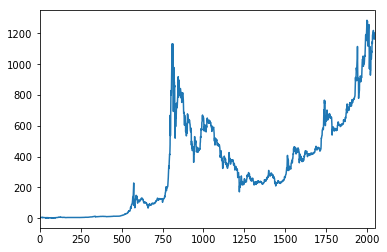

In [30]:
f = bitstamp_df['Close'].plot()

In [31]:
import tensorflow as tf

In [46]:
# first make value/label data
# features are prices (close for now) 30 days before current day
# label is price (close) on 31st day
test = pd.rolling_window(bitstamp_df['Open'], window=30)

/home/nate/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False,axis=0).mean()


In [47]:
test.shape

(2041,)

In [48]:
bitstamp_df['Open'].shape

(2041,)

In [116]:
features = []
targets = []

In [117]:
for i in range(30, bitstamp_df.shape[0]):
    features.append(bitstamp_df['Open'].iloc[i-30:i])
    targets.append(bitstamp_df['Open'].iloc[i])

In [118]:
features[10].shape

(30,)

In [119]:
len(features)

2011

In [124]:
pd.concat([features[0], features[1], features[2], features[3], features[4]], axis=1)

,Open,Open,Open,Open,Open
0,5.80,NaN,NaN,NaN,NaN
1,5.58,5.58,NaN,NaN,NaN
2,5.12,5.12,5.12,NaN,NaN
3,4.82,4.82,4.82,4.82,NaN
4,4.87,4.87,4.87,4.87,4.87
5,4.87,4.87,4.87,4.87,4.87
6,4.90,4.90,4.90,4.90,4.90
7,4.92,4.92,4.92,4.92,4.92
8,5.70,5.70,5.70,5.70,5.70
9,5.68,5.68,5.68,5.68,5.68


In [121]:
targets[:3]

[3.9300000000000002, 4.0499999999999998, nan]